<img src="../../../imgs/CampQMIND_banner.png">

# Principal Component Analysis

Principle component analysis (PCA) is a well known dimensionality reduction technique used in machine learning. This notebook provides both a simple implementation in numpy and an industry standard implementation in scikit-learn.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Principal Component Analysis</a></span></li><li><span><a href="#The-Intuition" data-toc-modified-id="The-Intuition-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Intuition</a></span><ul class="toc-item"><li><span><a href="#The-Covariance-Matrix" data-toc-modified-id="The-Covariance-Matrix-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The Covariance Matrix</a></span></li></ul></li><li><span><a href="#The-Algorithm" data-toc-modified-id="The-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Algorithm</a></span></li><li><span><a href="#Worked-Example" data-toc-modified-id="Worked-Example-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Worked Example</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#A-helpful-reminder-from-Aurélien-Géron." data-toc-modified-id="A-helpful-reminder-from-Aurélien-Géron.-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>A helpful reminder from Aurélien Géron.</a></span></li></ul></li></ul></li><li><span><a href="#Sklearn-PCA" data-toc-modified-id="Sklearn-PCA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sklearn PCA</a></span></li></ul></div>

# The Intuition

Often we are interested in visualizing our datasets. With PCA, we can project our high-dimensional dataset into a lower dimension of our choosing.

PCA identifies the direction (principal components) of most variance (through eigen decomposition), and projects the data on the given principal components. The principal components are selected to be uncorrelated with each other, thus are useful for dimensionality reduction.

__Note:__ The axes for the lower dimensional data lose their meaning and are difficuilt to interpret.

## The Covariance Matrix

PCA works through the eigen decompositon of its __Covariance Matrix__.

$$\text{Sample covariance matrix = } \frac{X^TX}{n-1}$$ where $X$ is the zero mean data matrix and n is the number of rows of the data matrix.

# The Algorithm

1. Calculate the covariance matrix.
2. Calculate the eigenvalues and eigenvectors of the covariance matrix.
3. Order the eigenvectors by decreasing eigenvalues.
4. Project the original data through the ordered eigenvectors by subsetting the eigenvectors by the desired number of components.

# Worked Example

In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
cancer = load_breast_cancer()

In [2]:
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data["label"] = cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### A helpful reminder from Aurélien Géron.

"PCA assumes that the dataset is centered around the origin. As we will see, Scikit-Learn’s PCA classes take care of centering the data for you. If you implement PCA yourself (as in the preceding example), or if you use other libraries, don’t forget to center the data first."[[1]]('https://books.google.com.tr/books/about/Hands_On_Machine_Learning_with_Scikit_Le.html?id=bRpYDgAAQBAJ&printsec=frontcover&source=kp_read_button&redir_esc=y#v=onepage&q&f=false')

Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems

In [3]:
def compute_pca(X):
    centered = X - X.mean()
    cov = centered.T @ centered /(len(X)-1)
    e_values, e_vectors = np.linalg.eig(cov)
    idx = e_values.argsort()[::-1]
    return np.dot(centered, e_vectors[idx])

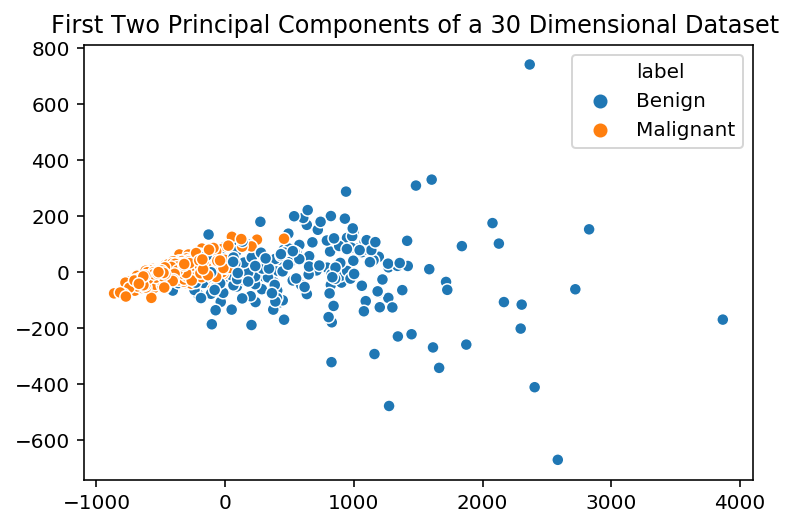

In [8]:
a = compute_pca(data.drop("label",axis=1))
sns.scatterplot(a[:,0],a[:,1],hue = data.label.map({1:"Malignant", 0:"Benign"}))
plt.title("First Two Principal Components of a 30 Dimensional Dataset ")
plt.show()

# Sklearn PCA

```python
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

```

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)
x = data.drop("label",axis=1).values
new = pca.fit_transform(x- x.mean())

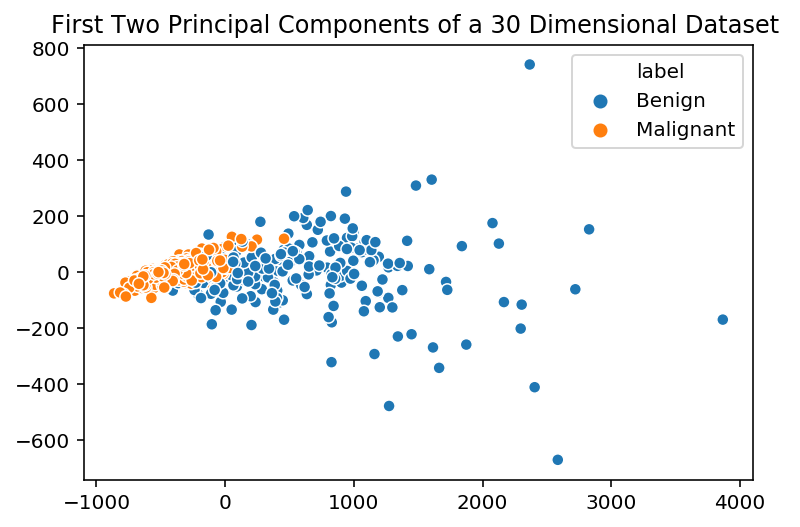

In [7]:
sns.scatterplot(new[:,0],new[:,1],hue = data.label.map({1:"Malignant", 0:"Benign"}))
plt.title("First Two Principal Components of a 30 Dimensional Dataset ")
plt.show()